Optical chirality #2
=========================================
*03/2021: updated to pyGDM v1.1+*


In this example, we reproduce the chirality of the optical near-field close to simple plasmonic nanostructures (nanospher and nanorod) as in *Schäferling et al.* [1].

[1]: Schäferling et al.: *Formation of chiral fields
in a symmetric environment* **Optics Express** 20(24), 26326 (2012) (https://doi.org/10.1364/OE.20.026326)

In [1]:
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields

from pyGDM2 import core
from pyGDM2 import propagators
from pyGDM2 import tools
from pyGDM2 import linear
from pyGDM2 import visu

import numpy as np
import matplotlib.pyplot as plt



#==============================================================================
# pyGDM setup
#==============================================================================
## --- Setup geometries for rod and sphere
step_rod = 10
L = 80.
W = 200.
H = 20
L_step = int(L/step_rod)
W_step = int(W/step_rod)
H_step = int(H/step_rod)
geo_rod = structures.rect_wire(step_rod, L=L_step, W=W_step, H=H_step, mesh='cube')

step_sphere = 3
geo_sphere = structures.sphere(step=step_sphere, R=4, mesh='hex')

material = materials.gold()

struct_rod = structures.struct(step_rod, geo_rod, material)
struct_sphere = structures.struct(step_sphere, geo_sphere, material)


## --- Setup incident field
field_generator = fields.plane_wave
kwargs = dict(inc_angle=180, E_s=1, E_p=0)  # illumination from top: 180
efield = fields.efield(field_generator, wavelengths=[1100], kwargs=kwargs)
efield_sphere = fields.efield(field_generator, wavelengths=[500], kwargs=kwargs)


## --- environment: vacuum
dyads = propagators.DyadsQuasistatic123(n1=1.0)


## --- setup simulations
sim_rod = core.simulation(struct_rod, efield, dyads)
print ('N_dipoles rod =', len(sim_rod.struct.geometry))

sim_sphere = core.simulation(struct_sphere, efield_sphere, dyads)
print ('N_dipoles sphere =', len(sim_sphere.struct.geometry))


structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 320/320 dipoles valid
structure initialization - automatic mesh detection: hex
structure initialization - consistency check: 425/425 dipoles valid
N_dipoles rod = 320
N_dipoles sphere = 425


running the simulation
--------------------------------

Now we run the simulation, calculate the optical chirality above and below the structure (and the RCP near-field intensity for comparison as well). Then we plot the results.

In [2]:
#==============================================================================
# run the simulations
#==============================================================================
core.scatter(sim_rod, verbose=True)
core.scatter(sim_sphere, verbose=True)

timing for wl=1100.00nm - setup: EE 5482.8ms, inv.: 125.3ms, repropa.: 4015.8ms (1 field configs), tot: 9624.5ms
timing for wl=500.00nm - setup: EE 24.4ms, inv.: 99.1ms, repropa.: 14.6ms (1 field configs), tot: 138.3ms


1

Plot the nano-sphere results
--------------------------------------------

/home/hans/.local/lib/python3.8/site-packages/pyGDM2/visu.py:49: UserWarning: 3D data. Falling back to XY projection...
  warnings.warn("3D data. Falling back to XY projection...")


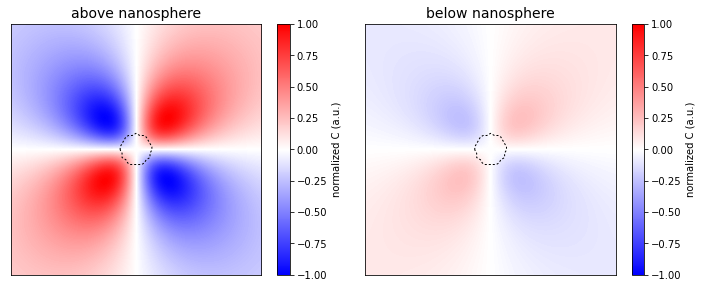

In [3]:
#%% -- small gold sphere
fieldindex = 0

r_probe_below = tools.generate_NF_map(-100,+100,61, -100,100,61, Z0=sim_sphere.struct.geometry.T[2].min() - step_rod/2 - 25)
r_probe_above = tools.generate_NF_map(-100,+100,61, -100,100,61, Z0=sim_sphere.struct.geometry.T[2].max() + step_rod/2 + 25)

C_above = linear.optical_chirality(sim_sphere, fieldindex, r_probe_above, which_field='t')
C_below = linear.optical_chirality(sim_sphere, fieldindex, r_probe_below, which_field='t')
normC = C_above[-1].max()
C_above[-1] = C_above[-1] / normC
C_below[-1] = C_below[-1] / normC

plt.figure(figsize=(10,4))
plt.subplot(121, aspect='equal')
plt.title("above nanosphere", fontsize=14)
im = visu.scalarfield(C_above, cmap='bwr', show=0, interpolation='bicubic')
plt.colorbar(im, label='normalized C (a.u.)')
im.set_clim(-1, 1)
visu.structure_contour(sim_sphere, color='k', dashes=[2,2], show=0)
plt.xticks([]); plt.yticks([])

plt.subplot(122, aspect='equal')
plt.title("below nanosphere", fontsize=14)
im = visu.scalarfield(C_below, cmap='bwr', show=0, interpolation='bicubic')
plt.colorbar(im, label='normalized C (a.u.)')
im.set_clim(-1, 1)
visu.structure_contour(sim_sphere, color='k', dashes=[2,2], show=0)
plt.xticks([]); plt.yticks([])

plt.tight_layout()
plt.show()


Plot the nano-rod results
--------------------------------------------

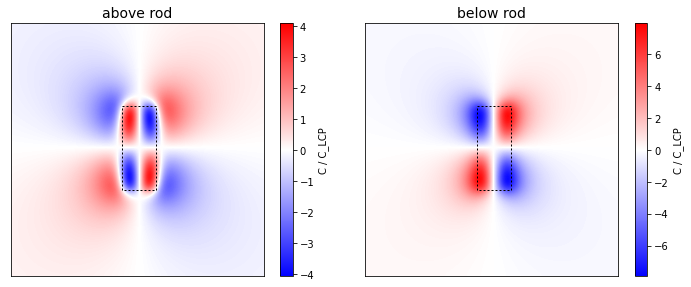

In [4]:
#%% -- gold rod
fieldindex = tools.get_closest_field_index(sim_rod, dict(wavelength=1100))# + 1

r_probe_below = tools.generate_NF_map(-300,+300,61, -300,300,61, Z0=sim_rod.struct.geometry.T[2].min() - step_rod/2 - 25)
r_probe_above = tools.generate_NF_map(-300,+300,61, -300,300,61, Z0=sim_rod.struct.geometry.T[2].max() + step_rod/2 + 25)

C_above = linear.optical_chirality(sim_rod, fieldindex, r_probe_above, which_field='t')
C_below = linear.optical_chirality(sim_rod, fieldindex, r_probe_below, which_field='t')


plt.figure(figsize=(10,4))
plt.subplot(121, aspect='equal')
plt.title("above rod", fontsize=14)
im = visu.scalarfield(C_above, cmap='bwr', show=0, interpolation='bicubic')
plt.colorbar(im, label='C / C_LCP')
visu.structure_contour(sim_rod, color='k', dashes=[2,2], show=0)
plt.xticks([]); plt.yticks([])

plt.subplot(122, aspect='equal')
plt.title("below rod", fontsize=14)
im = visu.scalarfield(C_below, cmap='bwr', show=0, interpolation='bicubic')
plt.colorbar(im, label='C / C_LCP')
visu.structure_contour(sim_rod, color='k', dashes=[2,2], show=0)
plt.xticks([]); plt.yticks([])

plt.tight_layout()
plt.show()
